In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn

In [134]:
df_mysql = pd.read_excel('Query_Results_for_Submission.xlsx','mysql')
df_mongo = pd.read_excel('Query_Results_for_Submission.xlsx','MongoDB')
df_mongo_s = df_mongo/1000 # convert from milliseconds to seconds.

In [4]:
df_mongo.head() # It's in millisecond in the original excel, while mysql is in second.

,M1,M2,M3,M4,M5,M6,M7,M8,M9,M10,M11,M12,M13,M14,M15,M16,M17,M18,M19,M20
0,729,293,10465,276,284,596,320,571,381,3333,323,3201,604,557,1097,741,301,731,3204,13845
1,351,295,3373,288,283,594,305,592,373,3244,333,3313,600,555,1007,739,286,705,3138,13789
2,369,299,3727,274,293,586,308,580,376,3479,318,3223,602,580,706,731,302,690,3190,13574
3,369,324,3250,278,268,598,311,605,381,3270,326,3190,606,568,726,751,300,679,3202,13957
4,348,303,3044,298,292,587,304,583,375,3230,334,3204,618,547,708,768,287,729,3219,13664


In [5]:
df_mongo_s.head()

,M1,M2,M3,M4,M5,M6,M7,M8,M9,M10,M11,M12,M13,M14,M15,M16,M17,M18,M19,M20
0,0.729,0.293,10.465,0.276,0.284,0.596,0.320,0.571,0.381,3.333,0.323,3.201,0.604,0.557,1.097,0.741,0.301,0.731,3.204,13.845
1,0.351,0.295,3.373,0.288,0.283,0.594,0.305,0.592,0.373,3.244,0.333,3.313,0.600,0.555,1.007,0.739,0.286,0.705,3.138,13.789
2,0.369,0.299,3.727,0.274,0.293,0.586,0.308,0.580,0.376,3.479,0.318,3.223,0.602,0.580,0.706,0.731,0.302,0.690,3.190,13.574
3,0.369,0.324,3.250,0.278,0.268,0.598,0.311,0.605,0.381,3.270,0.326,3.190,0.606,0.568,0.726,0.751,0.300,0.679,3.202,13.957
4,0.348,0.303,3.044,0.298,0.292,0.587,0.304,0.583,0.375,3.230,0.334,3.204,0.618,0.547,0.708,0.768,0.287,0.729,3.219,13.664


In [6]:
df_mysql.head()

,1_1,1_2,1_3,1_4,2_1,2_2,2_3,2_4,3_1,3_2,...,5_9,5_10,5_11,5_12,5_13,6_1,6_2,6_3,7_1,7_2
0,22.826244,20.380199,29.477347,39.293910,22.936980,22.949795,30.731996,30.862544,20.048638,20.120116,...,34.455552,30.974650,20.312570,30.834453,20.329142,34.774096,35.773656,35.686200,30.551285,210.358458
1,22.770131,20.513576,29.311396,39.290147,22.960146,23.178765,30.481443,30.891598,19.888751,19.853890,...,34.364694,31.272133,20.039312,30.372423,20.243454,34.525688,34.596442,35.866380,32.121110,216.870410
2,22.579949,21.595784,29.040001,38.970761,22.986143,23.004379,30.128161,31.021295,20.005888,19.907032,...,34.406442,30.918787,20.279686,30.419907,20.066568,34.810279,35.040081,36.203892,30.541651,218.135641
3,21.142644,20.336304,29.107159,39.362098,23.349349,23.194063,30.541324,31.001898,19.960912,20.014562,...,34.904581,30.965709,20.210577,30.976444,20.281098,34.711272,34.124756,35.456571,30.922937,218.402308
4,20.942539,20.547774,29.282100,39.763919,22.921676,24.568208,30.392173,30.433732,19.821504,19.854167,...,34.130922,30.900410,21.030719,30.415488,20.280647,34.693426,35.299472,35.561392,30.363304,223.089700


### Plot the data and find sharp fluctuations in the image

In [135]:
# def plot function, to make it easy
def plot_mysql(location_start,location_end,title_word):
    for key, value in df_mysql.iloc[:,location_start:location_end].items():
        plt.plot(df_mysql[key], label = 'mysql'+key)
    plt.legend(framealpha=0.2)
    plt.title(title_word+' time consuming with mysql')
    plt.show()
    
def Plot_mongo(location_start,location_end,title_word):
    for key, value in df_mongo_s.iloc[:,location_start:location_end].items():
        plt.plot(df_mongo_s[key], label = key)
    plt.legend(framealpha=0.2)
    plt.title(title_word+' time consuming with MongoDB')
    plt.show()

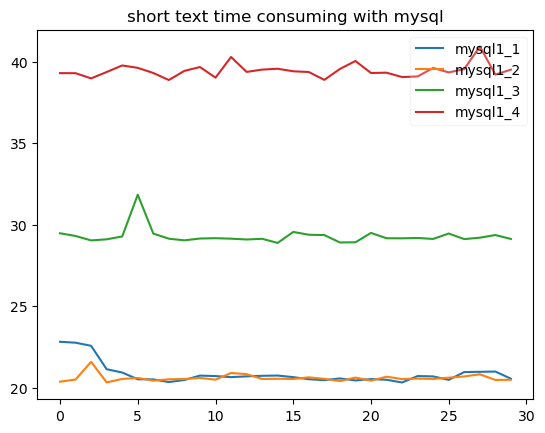

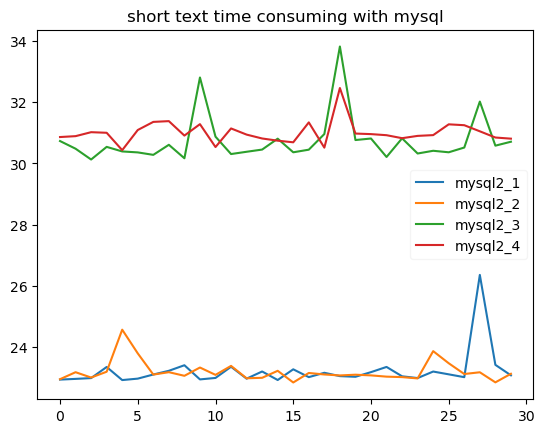

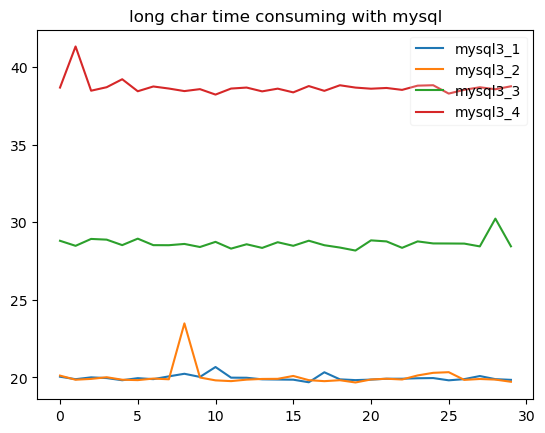

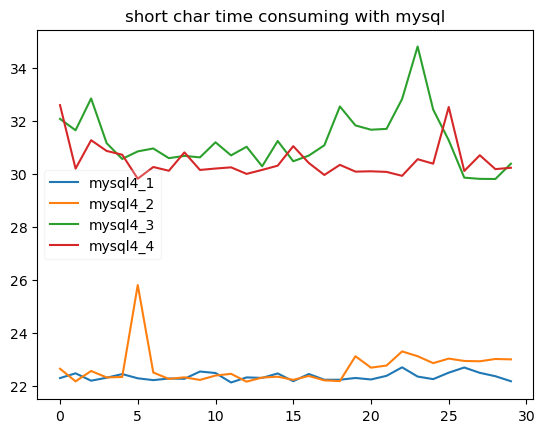

In [136]:
# plot part 1~4 for showing the results, and compare with after data cleaning
plot_mysql(0,4,'short text')
plot_mysql(4,8,'short text')
plot_mysql(8,12,'long char')
plot_mysql(12,16,'short char')

# It's a dataset for duble check the data, do the copy, or the data will change as a list after that.
temp = {}
temp['mysql1_1'] = df_mysql['1_1'].copy()
temp['mysql1_3'] = df_mysql['1_3'].copy()
temp['mysql3_2'] = df_mysql['3_2'].copy()
temp['mysql7_1'] = df_mysql['7_1'].copy()
temp['mysql7_2'] = df_mysql['7_2'].copy()

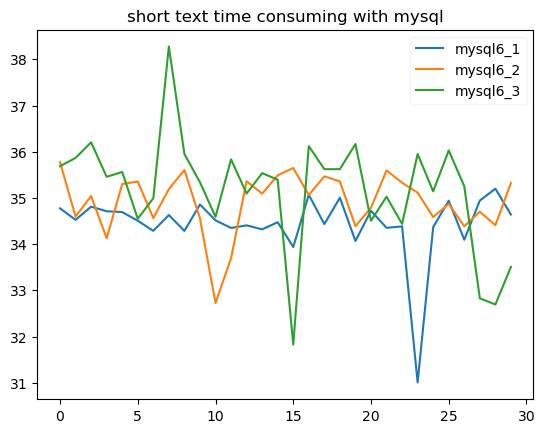

In [13]:
plot_mysql(29,32,'short text')

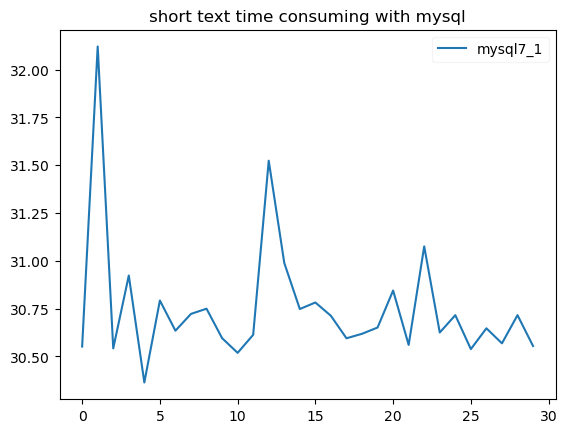

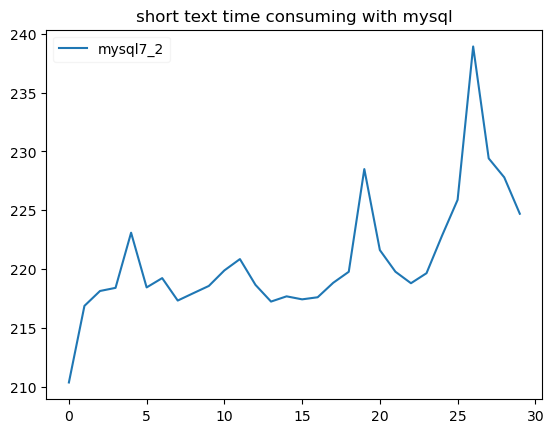

In [17]:
plot_mysql(32,33,'short text')
plot_mysql(33,34,'short text')

##### It is obvious that sharp fluctuations appears in the Plots, especially for long text plot. Even if we expand the data 30 times, the outliers may change the result sharply. So, we tried to eliminate the outliers.

### Eliminate outliers and replace them with median, because we believe the mean may not be that accurate here.

In [137]:
# data cleaning with mysql using quantile.
for column in df_mysql.columns:
    median = df_mysql[column].median()
    Q1 = df_mysql[column].quantile(0.25)
    Q3 = df_mysql[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_mysql.loc[(df_mysql[column] < lower_bound) | (df_mysql[column] > upper_bound), column] = median

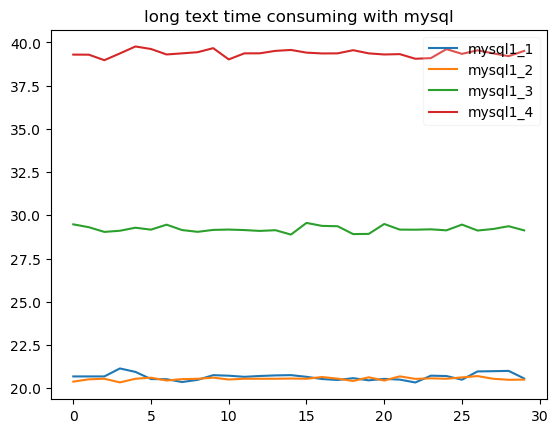

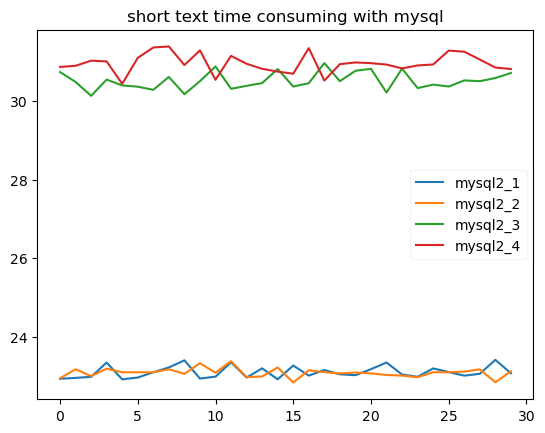

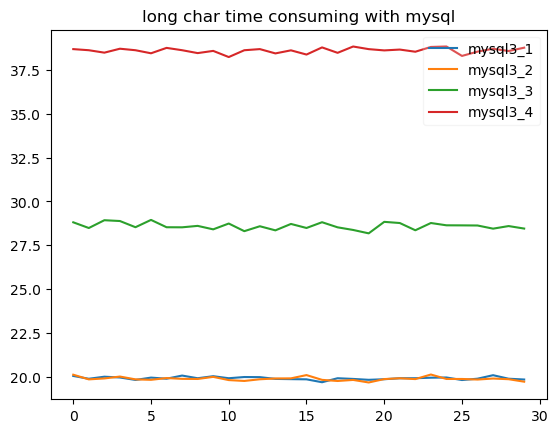

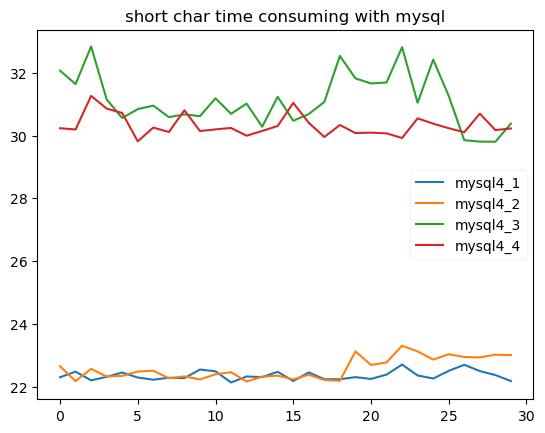

In [138]:
## It's a plot part for observe the results for part 1~4.

plot_mysql(0,4,'long text')
plot_mysql(4,8,'short text')
plot_mysql(8,12,'long char')
plot_mysql(12,16,'short char')

# make another copy for the certain data after data cleaning.
temp['mysql1_1_u'] = df_mysql['1_1']
temp['mysql1_3_u'] = df_mysql['1_3']
temp['mysql3_2_u'] = df_mysql['3_2']
temp['mysql7_1_u'] = df_mysql['7_1']
temp['mysql7_2_u'] = df_mysql['7_2']

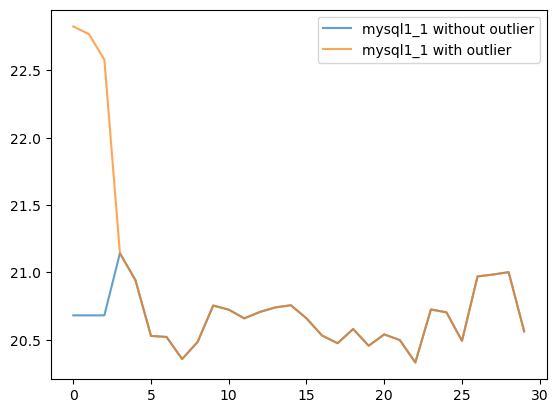

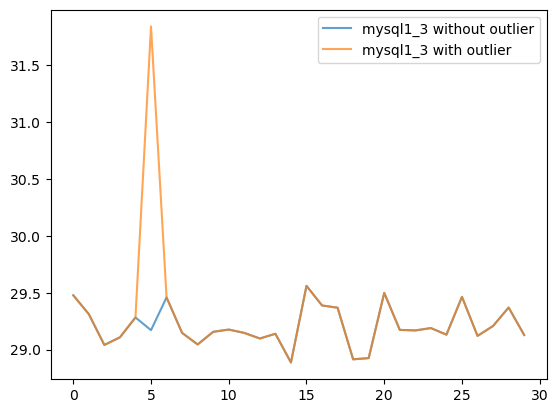

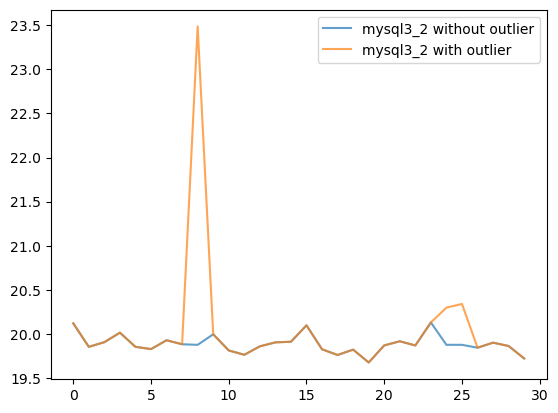

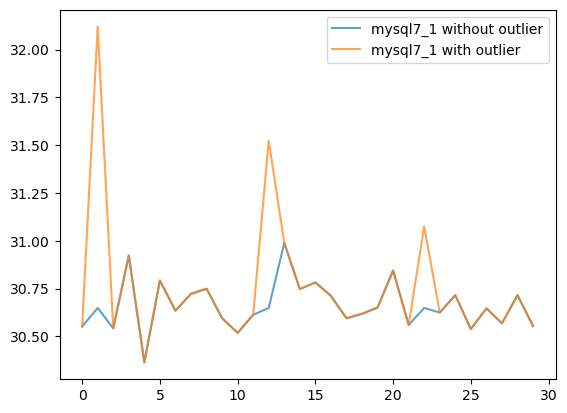

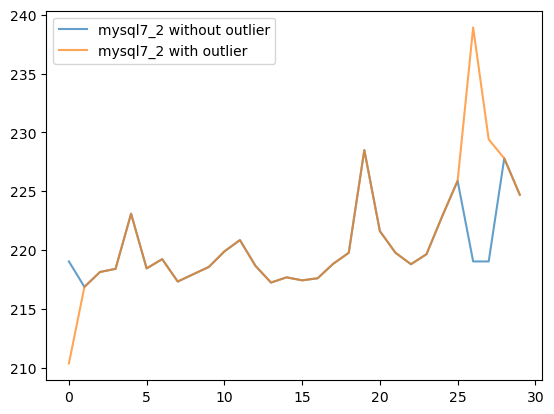

20.866841536666666 20.662443426666666
20.03556008333333 19.88578686833333


In [139]:
plt.plot(temp['mysql1_1_u'], label = 'mysql1_1 without outlier',alpha=0.7)
plt.plot(temp['mysql1_1'], label = 'mysql1_1 with outlier',alpha=0.7)
plt.legend()
plt.show()
plt.plot(temp['mysql1_3_u'], label = 'mysql1_3 without outlier',alpha=0.7)
plt.plot(temp['mysql1_3'], label = 'mysql1_3 with outlier',alpha=0.7)
plt.legend()
plt.show()
plt.plot(temp['mysql3_2_u'], label = 'mysql3_2 without outlier',alpha=0.7)
plt.plot(temp['mysql3_2'], label = 'mysql3_2 with outlier',alpha=0.7)
plt.legend()
plt.show()
plt.plot(temp['mysql7_1_u'], label = 'mysql7_1 without outlier',alpha=0.7)
plt.plot(temp['mysql7_1'], label = 'mysql7_1 with outlier',alpha=0.7)
plt.legend()
plt.show()
plt.plot(temp['mysql7_2_u'], label = 'mysql7_2 without outlier',alpha=0.7)
plt.plot(temp['mysql7_2'], label = 'mysql7_2 with outlier',alpha=0.7)
plt.legend()
plt.show()
print(temp['mysql1_1'].mean(),temp['mysql1_1_u'].mean())
print(temp['mysql3_2'].mean(),temp['mysql3_2_u'].mean())

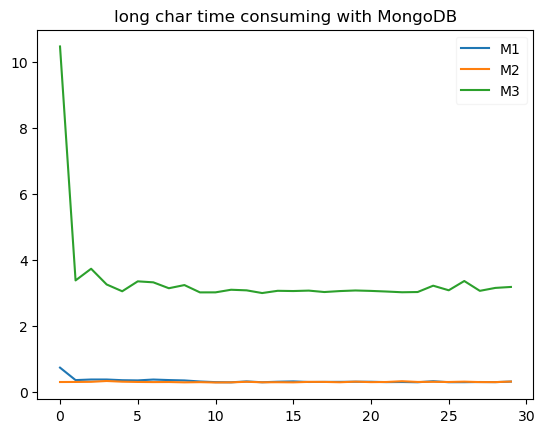

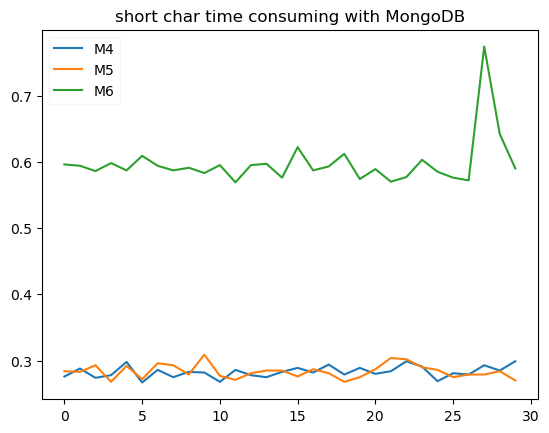

In [140]:
#chart before data cleaning for mongo
Plot_mongo(0,3,'long char')
Plot_mongo(3,6,'short char')

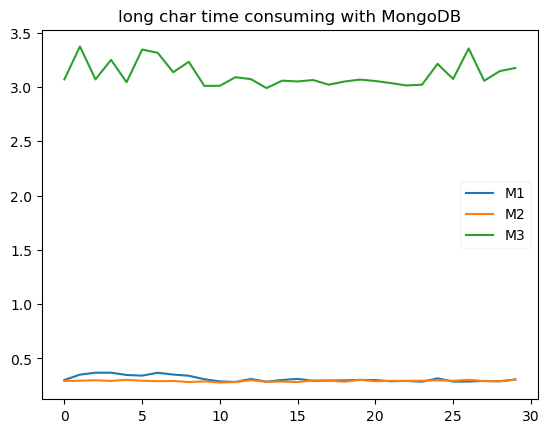

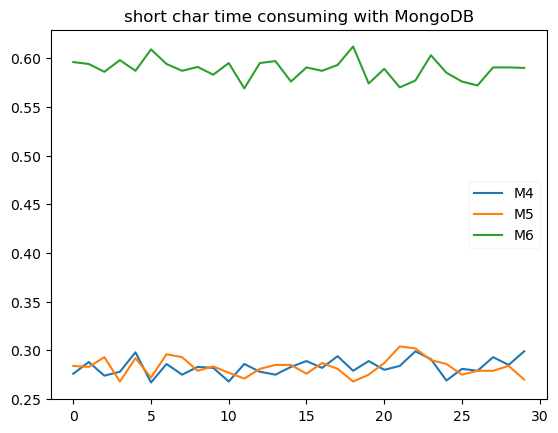

In [141]:
# data cleaning for mongo.
for column in df_mongo_s.columns:
    median = df_mongo_s[column].median()
    Q1 = df_mongo_s[column].quantile(0.25)
    Q3 = df_mongo_s[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_mongo_s.loc[(df_mongo_s[column] < lower_bound) | (df_mongo_s[column] > upper_bound), column] = median

Plot_mongo(0,3,'long char')
Plot_mongo(3,6,'short char')

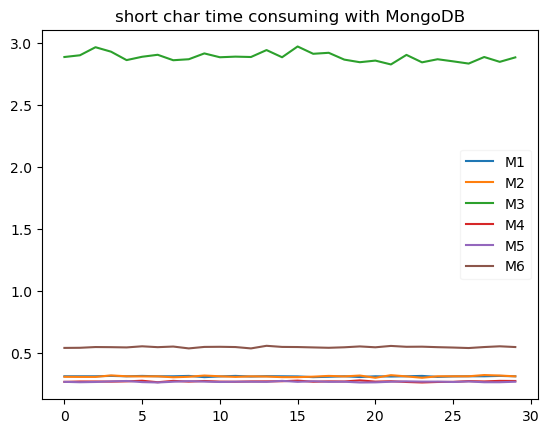

In [118]:
# # for check agian if we do the change, especially when the notebook was restarted, and see strange plot below.
# Plot_mongo(0,3,'long char')
# Plot_mongo(3,6,'short char')

### 1. analyze part 1~4 one by one

##### 1.1 mysql part

In [142]:
# redefine plot function without show function
def plot_mysql(location_start,location_end,title_word):
    for key, value in df_mysql.iloc[:,location_start:location_end].items():
        plt.plot(df_mysql[key], label = 'mysql'+key)
    plt.legend(framealpha=0.2)
    plt.title(title_word+' time consuming with mysql')
    
def Plot_mongo(location_start,location_end,title_word):
    for key, value in df_mongo_s.iloc[:,location_start:location_end].items():
        plt.plot(df_mongo_s[key], label = key)
    plt.legend(framealpha=0.2)
    plt.title(title_word+' time consuming with MongoDB')

In [143]:
# define the t-test function for convenient.
def t_test(x,y): 
    print(x.mean(),y.mean())
    t_statistic, p_value = stats.ttest_ind(x, y)
    print("t-statistic:", t_statistic)
    print("p-value:", p_value)
    if p_value > 0.05:
        print("There's no significant difference between two data set.")

# define one tailed t-test for convenient, notice that in the function, x should be greater than y.
def one_t_test(x,y):
    t_stat, p_value = stats.ttest_ind(x,y, alternative='greater')
    # significant level
    alpha = 0.05
    if p_value < alpha:
        print("{} is significantly greater than {}".format(x.name,y.name))
    else:
        print("It is not significantly greater.")

# define the function for average difference.
def diff_avg(x,y):
    print(x.mean(),y.mean())
    print(abs(x.mean()-y.mean()))

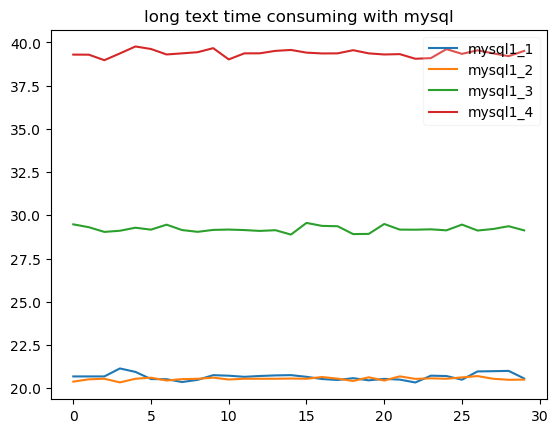

The result is obvious for sql_query 1-3 and 1-4, which is long text


In [25]:
plot_mysql(0,4,'long text')
plt.show()
print("The result is obvious for sql_query 1-3 and 1-4, which is long text")

In [26]:
# do t-test for mysql1_1 and 1_2
t_test(df_mysql['1_1'], df_mysql['1_2'])
one_t_test(df_mysql['1_1'], df_mysql['1_2'])
# Then it shows that the query 1_1 statistically significantly takes more time than 1_2, as One-tailed p-value much less than 0.05.

20.662443426666666 20.54037890333334
t-statistic: 3.1491956929332643
p-value: 0.002587394618303368
1_1 is significantly greater than 1_2


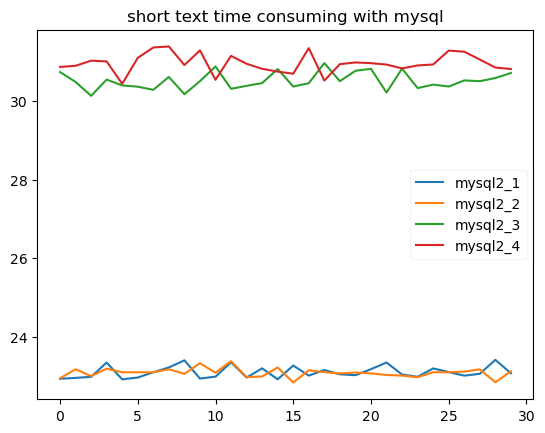

The result is obvious for sql_query 2-1 and 2-2 to 2-3 and 2-4, which is short text


In [27]:
plot_mysql(4,8,'short text')
plt.show()
print("The result is obvious for sql_query 2-1 and 2-2 to 2-3 and 2-4, which is short text")

In [28]:
# t test for 2-1 and 2-2 

t_test(df_mysql['2_1'], df_mysql['2_2'])
# It shows that the difference is not significant, the two set can be said equal.

23.107273838333338 23.09097112333333
t-statistic: 0.46081920691648615
p-value: 0.6466516274439886
There's no significant difference between two data set.


In [57]:
# t test for 2-3 and 2-4

t_test(df_mysql['2_3'], df_mysql['2_4'])
one_t_test(df_mysql['2_4'],df_mysql['2_3'])
diff_avg(df_mysql['2_3'], df_mysql['2_4'])

30.51067897166666 30.954689761666668
t-statistic: -7.457359472433512
p-value: 4.992427992343257e-10
2_4 is significantly greater than 2_3
30.51067897166666 30.954689761666668
0.4440107900000072


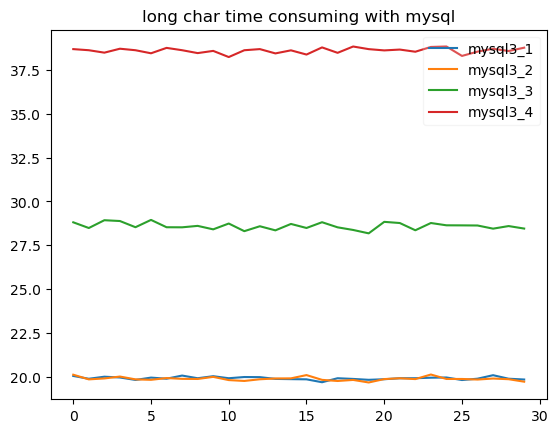

The relationship is obvious for mysql3_3 and 3_4.


In [34]:
plot_mysql(8,12,'long char')
plt.show()
print("The relationship is obvious for mysql3_3 and 3_4.")

In [33]:
t_test(df_mysql['3_1'],df_mysql['3_2'])

19.918397619999997 19.88578686833333
t-statistic: 1.3305428204331493
p-value: 0.18854720254984297
There's no significant difference between two data set.


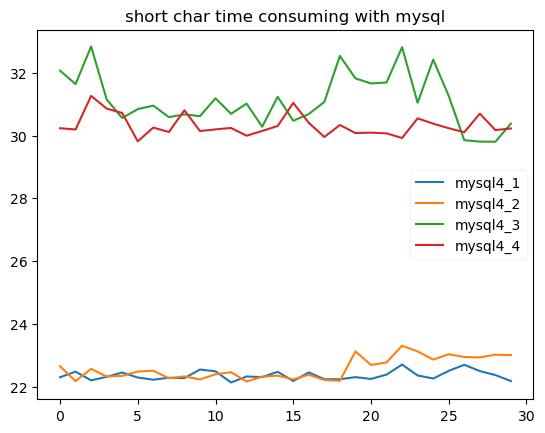

In [35]:
plot_mysql(12,16,'short char')
plt.show()

In [37]:
t_test(df_mysql['4_2'], df_mysql['4_1'])
one_t_test(df_mysql['4_2'], df_mysql['4_1'])

22.580527941666674 22.357388346666667
t-statistic: 3.262098296737876
p-value: 0.001855267914661022
4_2 is significantly greater than 4_1


In [39]:
t_test(df_mysql['4_3'], df_mysql['4_4'])
one_t_test(df_mysql['4_3'],df_mysql['4_4'])

31.12131193166666 30.31781218
t-statistic: 4.891523651734171
p-value: 8.3091163207135e-06
4_3 is significantly greater than 4_4


##### comparation between them

1_ represent long text, 2_ represent short text.


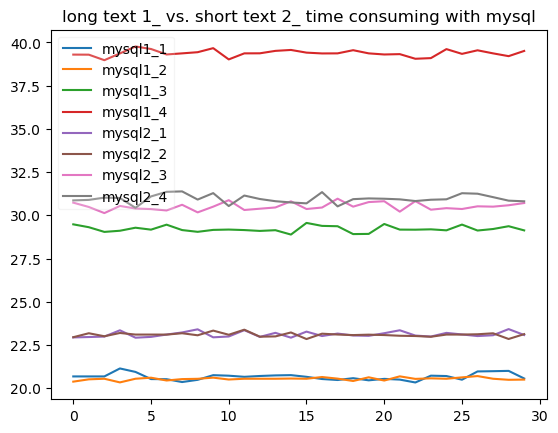

In [40]:
# long text vs short text
print("1_ represent long text, 2_ represent short text.")
plot_mysql(0,8,'long text 1_ vs. short text 2_')
plt.show()

In [42]:
t_test(df_mysql['1_1'], df_mysql['2_1'])
one_t_test(df_mysql['2_1'],df_mysql['1_1'])
one_t_test(df_mysql['2_2'],df_mysql['1_2'])

20.662443426666666 23.107273838333338
t-statistic: -53.642073712653016
p-value: 3.974596218679537e-51
2_1 is significantly greater than 1_1
2_2 is significantly greater than 1_2


3_ represent long varchar, 4_ represent short varchar.


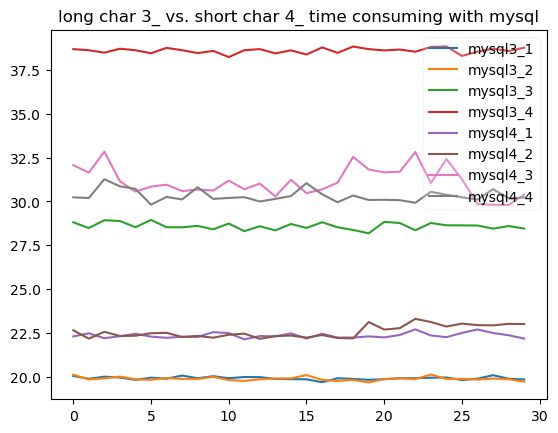

In [43]:
# long varchar vs. short varchar
print("3_ represent long varchar, 4_ represent short varchar.")
plot_mysql(8,16,'long char 3_ vs. short char 4_')
plt.show()

In [147]:
t_test(df_mysql['3_1'], df_mysql['4_1'])
t_test(df_mysql['3_2'], df_mysql['4_2'])
one_t_test(df_mysql['4_1'], df_mysql['3_1'])
one_t_test(df_mysql['4_2'], df_mysql['3_2'])
one_t_test(df_mysql['4_3'], df_mysql['3_3'])

19.918397619999997 22.357388346666667
t-statistic: -79.4209124204822
p-value: 7.049935368083264e-61
19.88578686833333 22.580527941666674
t-statistic: -40.92020733822434
p-value: 1.752476035231471e-44
4_1 is significantly greater than 3_1
4_2 is significantly greater than 3_2
4_3 is significantly greater than 3_3


1_ represent long text, 3_ represent short char.


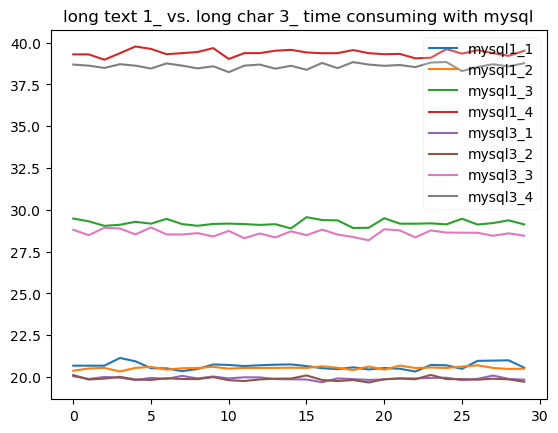

In [48]:
# long text 1_ vs. long char 3_
print("1_ represent long text, 3_ represent short char.")
plot_mysql(0,4,'')
plot_mysql(8,12,'long text 1_ vs. long char 3_')
plt.show()

1_ represent long text, 3_ represent long char.


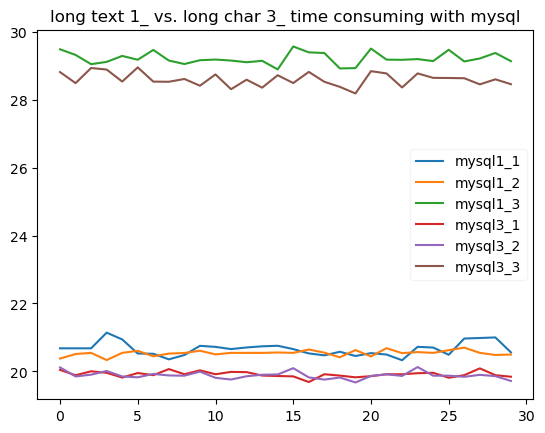

In [59]:
# long text 1_ vs. long char 3_
print("1_ represent long text, 3_ represent long char.")
plot_mysql(0,3,'')
plot_mysql(8,11,'long text 1_ vs. long char 3_')
plt.show()

In [61]:
t_test(df_mysql['1_1'], df_mysql['3_1'])
one_t_test(df_mysql['1_1'], df_mysql['3_1'])

20.662443426666666 19.918397619999997
t-statistic: 19.093384237204344
p-value: 1.0914360148278308e-26
1_1 is significantly greater than 3_1


In [62]:
t_test(df_mysql['1_2'], df_mysql['3_2'])
one_t_test(df_mysql['1_2'],df_mysql['3_2'])

20.54037890333334 19.88578686833333
t-statistic: 27.075099398976427
p-value: 1.3354901529177441e-34
1_2 is significantly greater than 3_2


In [64]:
t_test(df_mysql['1_3'], df_mysql['3_3'])
one_t_test(df_mysql['1_3'], df_mysql['3_3'])

29.20788680499999 28.593318384999993
t-statistic: 12.77940424395583
p-value: 1.644422251573455e-18
1_3 is significantly greater than 3_3


2_ represent short text, 4_ represent short varchar.


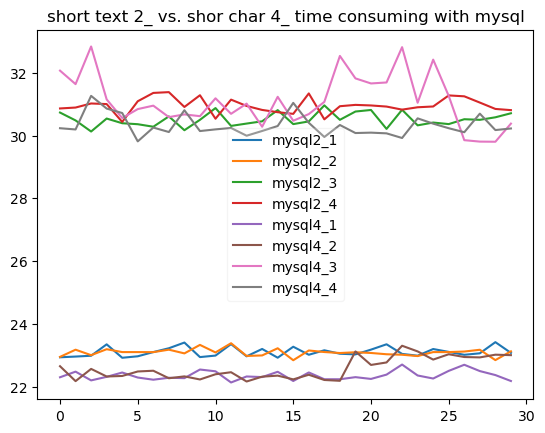

In [144]:
# short text 2_ vs. short char 4_
print("2_ represent short text, 4_ represent short varchar.")
plot_mysql(4,8,'')
plot_mysql(12,16,'short text 2_ vs. shor char 4_')
plt.show()

In [146]:
t_test(df_mysql['2_1'], df_mysql['4_1'])
one_t_test(df_mysql['2_1'],df_mysql['4_1'])
t_test(df_mysql['2_2'],df_mysql['4_2'])
one_t_test(df_mysql['2_2'],df_mysql['4_2'])
t_test(df_mysql['2_3'], df_mysql['4_3'])
one_t_test(df_mysql['4_3'],df_mysql['2_3'])
t_test(df_mysql['2_4'],df_mysql['4_4'])
one_t_test(df_mysql['2_4'],df_mysql['4_4'])
# one_t_test(df_mysql['2_4'],df_mysql['4_4'])

23.107273838333338 22.357388346666667
t-statistic: 19.35062786529196
p-value: 5.5702551639599776e-27
2_1 is significantly greater than 4_1
23.09097112333333 22.580527941666674
t-statistic: 7.670081885745082
p-value: 2.1916750189180325e-10
2_2 is significantly greater than 4_2
30.51067897166666 31.12131193166666
t-statistic: -3.8853244034411865
p-value: 0.0002648345492908644
4_3 is significantly greater than 2_3
30.954689761666668 30.31781218
t-statistic: 8.343174243564933
p-value: 1.6331229130302833e-11
2_4 is significantly greater than 4_4


##### 1.2 Mongo part 1~4

2.0796819787985865 9.967580249546765
Apparently regex run much more time comparing with equal or in, like about 2~10 times,according to the length of the text.


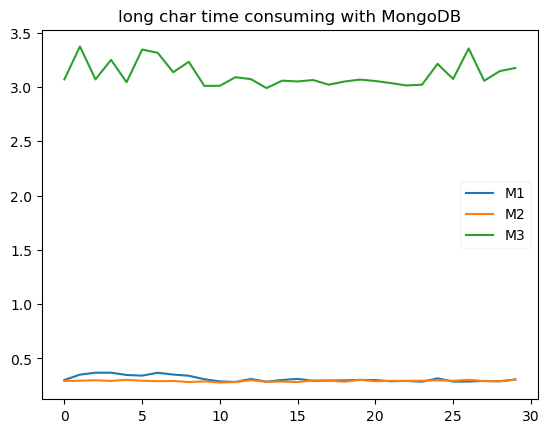

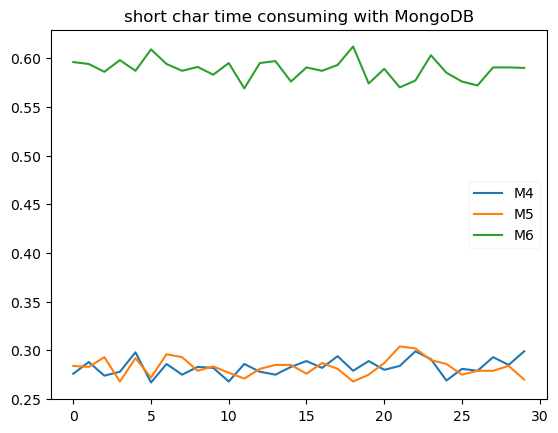

In [69]:
# apparently regex run much more time comparing with equal or in, like about 2~9 times,according to the length of the text.
print(df_mongo_s.iloc[:,5].mean()/df_mongo_s.iloc[:,3].mean(),df_mongo_s.iloc[:,2].mean()/df_mongo_s.iloc[:,0].mean())
print('Apparently regex run much more time comparing with equal or in, like about 2~10 times,according to the length of the text.')

Plot_mongo(0,3,'long char')
plt.show()
Plot_mongo(3,6,'short char')
plt.show()

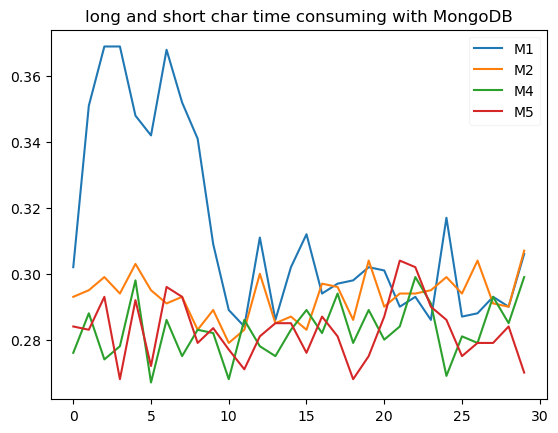

In [70]:
Plot_mongo(0,2,'long char')
Plot_mongo(3,5,'long and short char')
plt.show()

In [72]:
# t test for M1 and M2
t_test(df_mongo_s['M1'], df_mongo_s['M2'])
one_t_test(df_mongo_s['M1'], df_mongo_s['M2'])

0.31256666666666655 0.29309999999999997
t-statistic: 3.7092754286731546
p-value: 0.00046721487765403536
M1 is significantly greater than M2


In [74]:
# t test for M1 and M2
t_test(df_mongo_s['M4'], df_mongo_s['M5'])
# one_t_test(df_mongo_s['M4'], df_mongo_s['M5'])

0.283 0.28285
t-statistic: 0.0646835857987215
p-value: 0.948648360992475
There's no significant difference between two data set.


The plot is clear for some relationships.


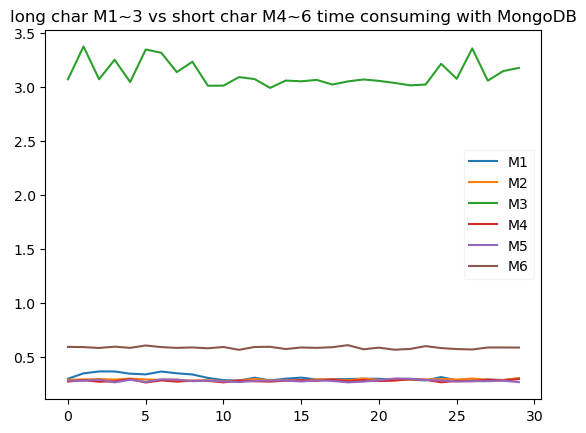

In [76]:
# between long char M1~M3 and short char M4~M6
print('The plot is clear for some relationships.')
Plot_mongo(0,6,'long char M1~3 vs short char M4~6')

In [80]:
t_test(df_mongo_s['M2'],df_mongo_s['M4'])
one_t_test(df_mongo_s['M2'],df_mongo_s['M4'])
t_test(df_mongo_s['M3'],df_mongo_s['M6'])
one_t_test(df_mongo_s['M3'],df_mongo_s['M6'])

0.29309999999999997 0.283
t-statistic: 4.99244521509391
p-value: 5.774180342580709e-06
M2 is significantly greater than M4
3.115533333333333 0.5885499999999999
t-statistic: 121.70944578535857
p-value: 1.4473080387262716e-71
M3 is significantly greater than M6


##### 1.3 Analyze part 1~4 between database

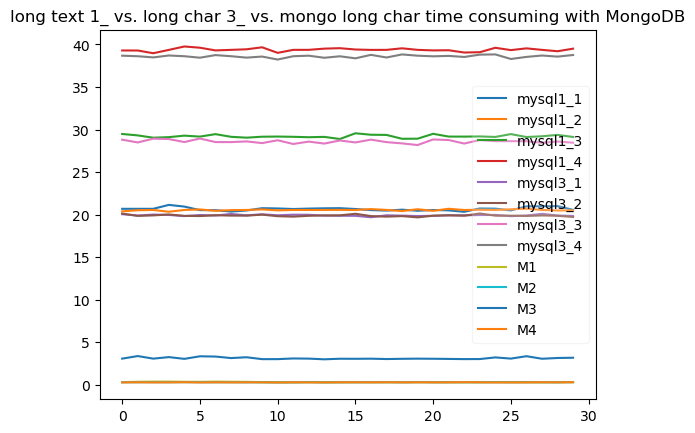

In [81]:
plot_mysql(0,4,'long text 1_ vs. long char 3_ vs. mongo long char')
plot_mysql(8,12,'long text 1_ vs. long char 3_ vs. mongo long char')
Plot_mongo(0,4,'long text 1_ vs. long char 3_ vs. mongo long char')
plt.show()

In [82]:
# try find the multiple for the relationships.
times = {}
times['1_s1'] = df_mysql['1_1'].mean()/df_mongo_s['M1'].mean()
times['1_s3'] = df_mysql['3_1'].mean()/df_mongo_s['M1'].mean()
times['2_s1'] = df_mysql['1_2'].mean()/df_mongo_s['M2'].mean()
times['2_s3'] = df_mysql['3_2'].mean()/df_mongo_s['M2'].mean()
times['3_s1'] = df_mysql['1_3'].mean()/df_mongo_s['M3'].mean()
times['3_s3'] = df_mysql['3_3'].mean()/df_mongo_s['M3'].mean()
times['4_s1'] = df_mysql['1_4'].mean()/df_mongo_s['M4'].mean()
times['4_s3'] = df_mysql['3_4'].mean()/df_mongo_s['M4'].mean()
# print(times)

max_value = max(times.values())
max_label = [key for key, value in times.items() if value == max_value][0]

min_value = min(times.values())
min_label = [key for key, value in times.items() if value == min_value][0]

average_value = sum(times.values()) / len(times)
print('Average multiple:',average_value,'\n',"Times range from mysql{}_{}-M{}: {} to mysql{}_{}-M{}: {}".format(min_label[-1],min_label[0],min_label[0],min_value, max_label[-1],max_label[0],max_label[0], max_value))

Average multiple: 70.22962797744133 
 Times range from mysql3_3-M3: 9.177664086940704 to mysql1_4-M4: 139.13690393992937


### Part 5

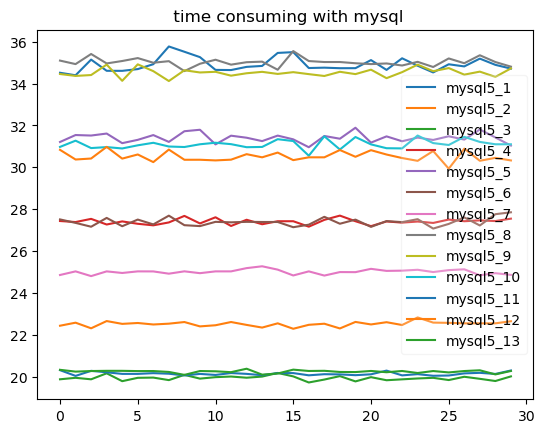

In [83]:
plot_mysql(16,29,'')
plt.show()

##### 5.1 mysql part 5

##### 5.1.1 comparation within

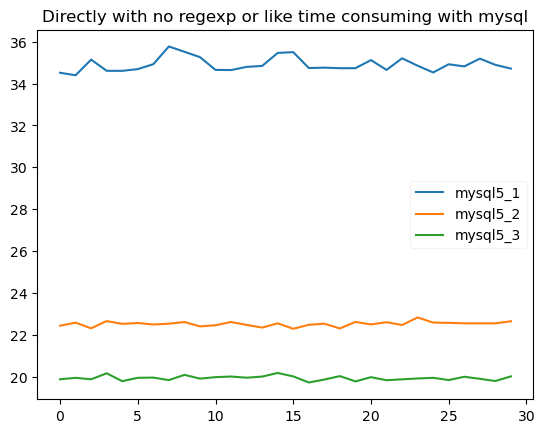

In [84]:
# directly with operator not, and, or
plot_mysql(16,19,'Directly with no regexp or like')
plt.show()

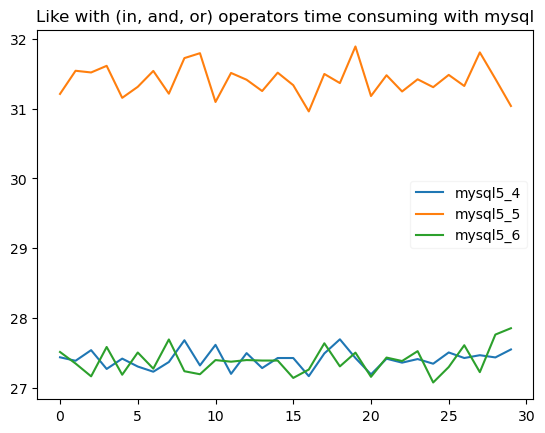

In [85]:
# Like with operator not, and, or
plot_mysql(19,22,'Like with (in, and, or) operators')
plt.show()

In [87]:
t_test(df_mysql['5_5'],df_mysql['5_6'])
one_t_test(df_mysql['5_5'],df_mysql['5_6'])

31.404875131666667 27.39277478666667
t-statistic: 73.670628392813
p-value: 5.2849953110286725e-59
5_5 is significantly greater than 5_6


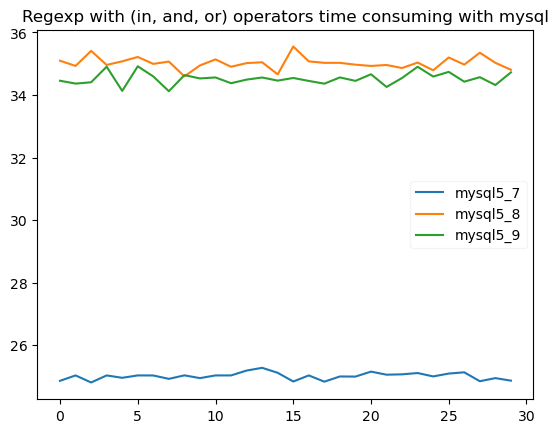

In [88]:
# regexp with operator not, and, or
plot_mysql(22,25,'Regexp with (in, and, or) operators')
plt.show()

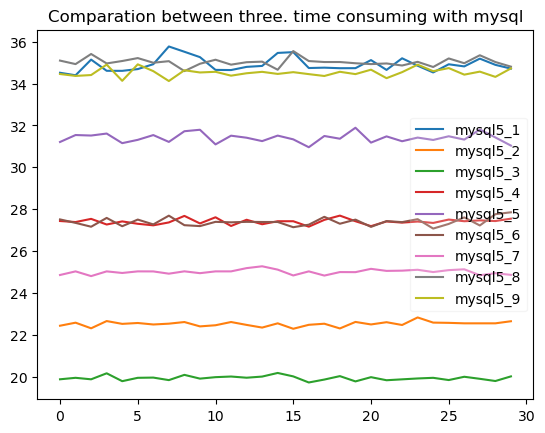

In [89]:
# those three   1~3 directly; 4~6 Like; 7~9 regexp;
plot_mysql(16,25,'Comparation between three.')
plt.show()

##### 5.1.2 comparation between operators in regexp and out of regexp

 It is obvious that operators in the regexp will take less time. try to run agian the data set, maybe has been run seperately.


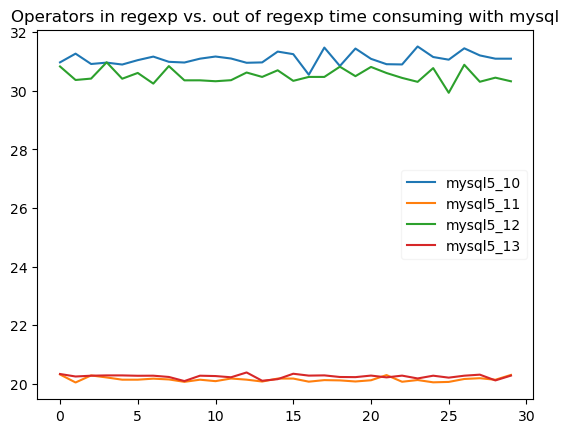

In [90]:
# The and operator here is not accurate, it's just a simulate.
print(" It is obvious that operators in the regexp will take less time.",'try to run agian the data set, maybe has been run seperately.') #try to run agian the data set, maybe hsa been run seperately.
plot_mysql(25,29,'Operators in regexp vs. out of regexp')
plt.show()

In [92]:
t_test(df_mysql['5_11'],df_mysql['5_13'])
one_t_test(df_mysql['5_13'],df_mysql['5_11'])

20.142436789999998 20.24523189833333
t-statistic: -5.554102060390034
p-value: 7.311040514157446e-07
5_13 is significantly greater than 5_11


##### 5.1.3 Try to find relationships between with operations and run them seperatly.

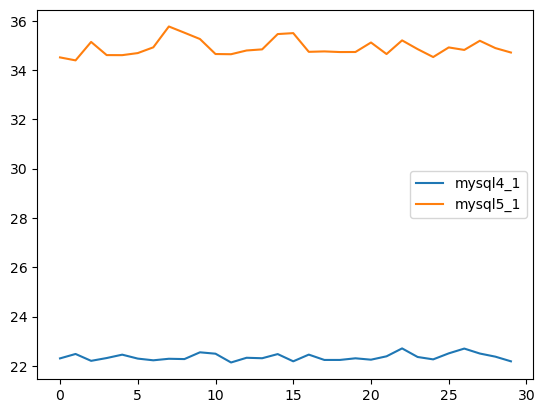

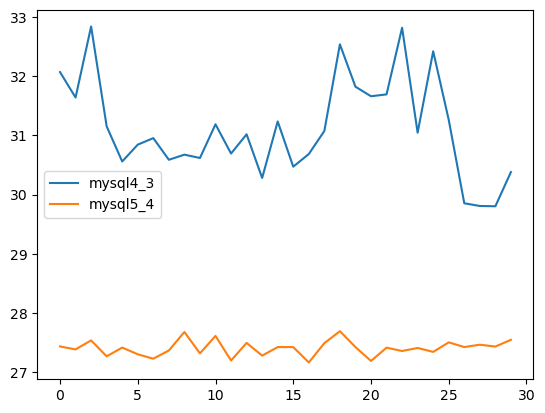

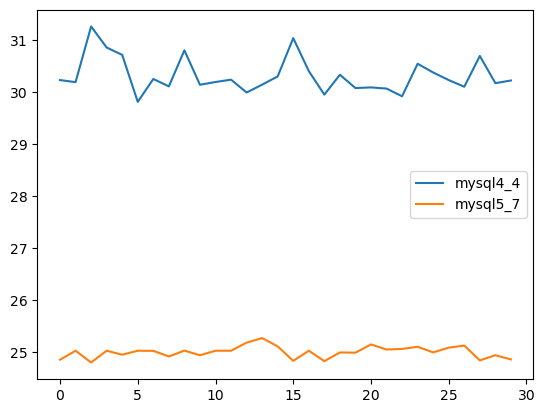

In [93]:
# not operator
plt.plot(df_mysql['4_1'],label = 'mysql4_1')
plt.plot(df_mysql['5_1'],label = 'mysql5_1')
plt.legend()
plt.show()

plt.plot(df_mysql['4_3'],label = 'mysql4_3')
plt.plot(df_mysql['5_4'],label = 'mysql5_4')
plt.legend()
plt.show()

plt.plot(df_mysql['4_4'],label = 'mysql4_4')
plt.plot(df_mysql['5_7'],label = 'mysql5_7')
plt.legend()
plt.show()

# suppose there are some mistakes in the dataset?


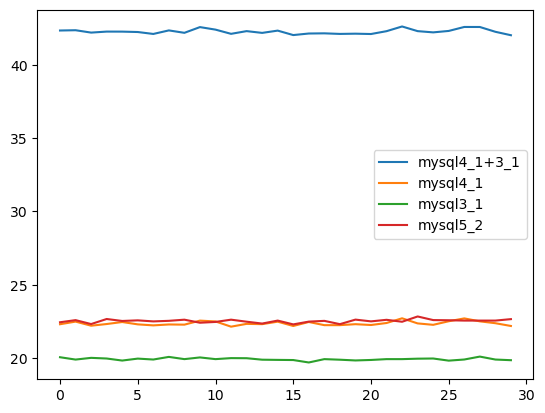

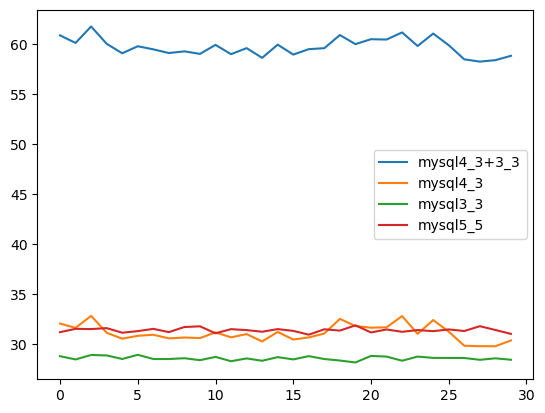

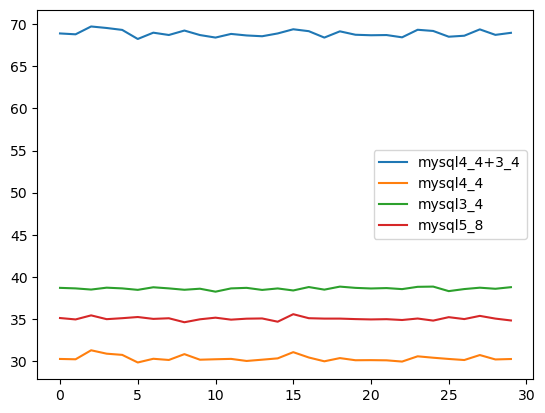

In [94]:
# or operation
plt.plot(df_mysql['4_1']+df_mysql['3_1'],label = 'mysql4_1+3_1')
plt.plot(df_mysql['4_1'],label = 'mysql4_1')
plt.plot(df_mysql['3_1'],label = 'mysql3_1')
plt.plot(df_mysql['5_2'],label = 'mysql5_2')
plt.legend()
plt.show()

plt.plot(df_mysql['4_3']+df_mysql['3_3'],label = 'mysql4_3+3_3')
plt.plot(df_mysql['4_3'],label = 'mysql4_3')
plt.plot(df_mysql['3_3'],label = 'mysql3_3')
plt.plot(df_mysql['5_5'],label = 'mysql5_5')
plt.legend()
plt.show()

plt.plot(df_mysql['4_4']+df_mysql['3_4'],label = 'mysql4_4+3_4')
plt.plot(df_mysql['4_4'],label = 'mysql4_4')
plt.plot(df_mysql['3_4'],label = 'mysql3_4')
plt.plot(df_mysql['5_8'],label = 'mysql5_8')
plt.legend()
plt.show()

# haven't found the pattern yet, when one get satified the search whould stop? may not be simply we thought as 1+1.

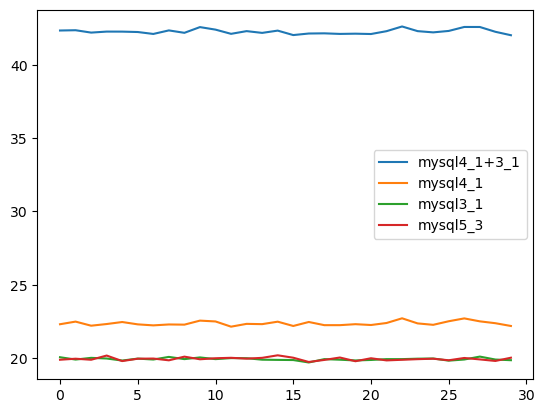

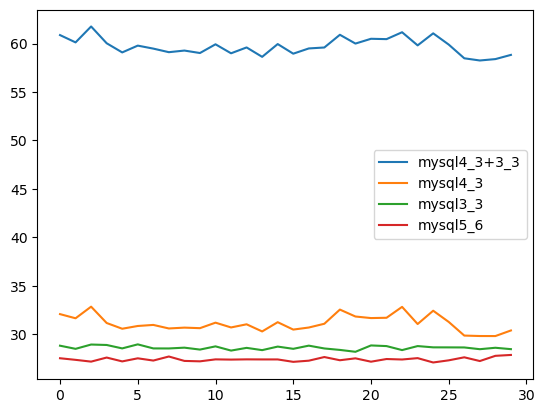

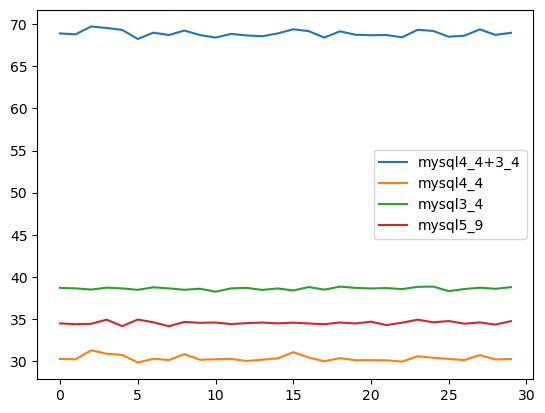

In [95]:
# and operator
plt.plot(df_mysql['4_1']+df_mysql['3_1'],label = 'mysql4_1+3_1')
plt.plot(df_mysql['4_1'],label = 'mysql4_1')
plt.plot(df_mysql['3_1'],label = 'mysql3_1')
plt.plot(df_mysql['5_3'],label = 'mysql5_3')
plt.legend()
plt.show()

plt.plot(df_mysql['4_3']+df_mysql['3_3'],label = 'mysql4_3+3_3')
plt.plot(df_mysql['4_3'],label = 'mysql4_3')
plt.plot(df_mysql['3_3'],label = 'mysql3_3')
plt.plot(df_mysql['5_6'],label = 'mysql5_6')
plt.legend()
plt.show()

plt.plot(df_mysql['4_4']+df_mysql['3_4'],label = 'mysql4_4+3_4')
plt.plot(df_mysql['4_4'],label = 'mysql4_4')
plt.plot(df_mysql['3_4'],label = 'mysql3_4')
plt.plot(df_mysql['5_9'],label = 'mysql5_9')
plt.legend()
plt.show()

# again may be when do not satisfy the first judgement will stop the query? may not be simply we thought as 1+1.

##### 5.2 Mongo Part 5

##### 5.2.1 comparation within

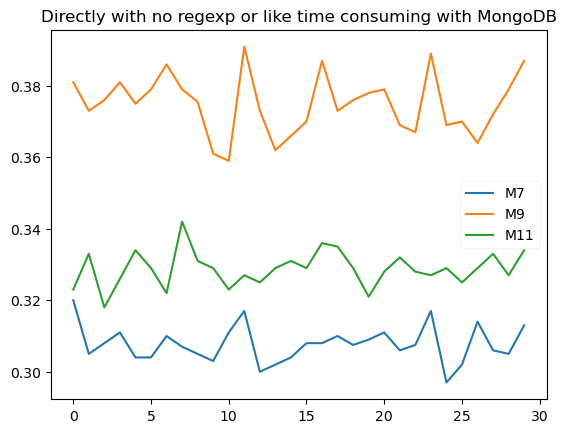

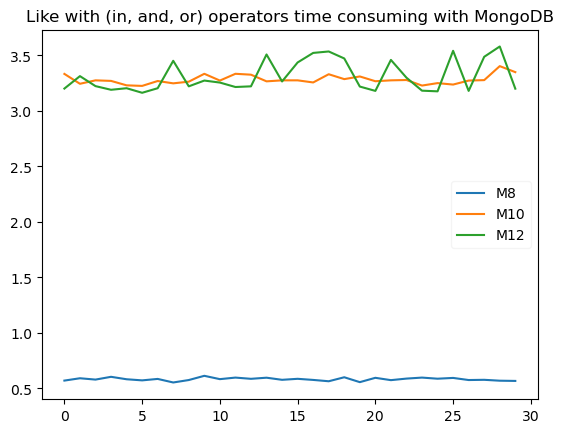

In [96]:
# directly with operator not, and, or
Plot_mongo(6,7,'Directly with no regexp or like')
Plot_mongo(8,9,'Directly with no regexp or like')
Plot_mongo(10,11,'Directly with no regexp or like')
plt.show()
# regexp with operator not, and, or
Plot_mongo(7,8,'Like with (in, and, or) operators')
Plot_mongo(9,10,'Like with (in, and, or) operators')
Plot_mongo(11,12,'Like with (in, and, or) operators')
plt.show()

In [97]:
t_test(df_mongo_s['M10'],df_mongo_s['M12'])

3.2819666666666674 3.3125000000000013
t-statistic: -1.14085307371895
p-value: 0.25861992422550395
There's no significant difference between two data set.


##### 5.2.2 in and out of regexp

 It is obvious that operators in the regexp will take less time. try to run agian the data set, maybe has been run seperately.


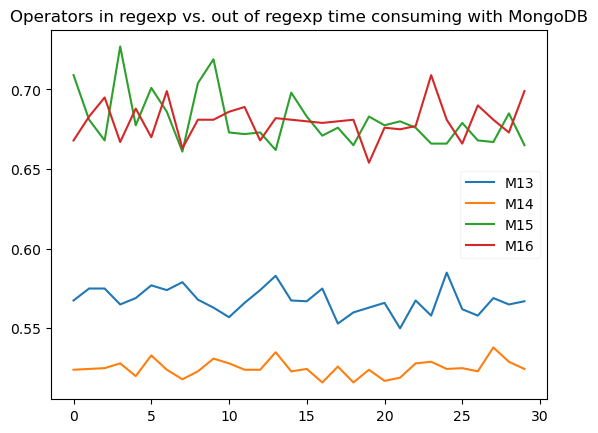

In [120]:
Plot_mongo(12,16,'Operators in regexp vs. out of regexp')
plt.show()

In [99]:
t_test(df_mongo_s['M15'],df_mongo_s['M16'])
one_t_test(df_mongo_s['M16'],df_mongo_s['M15'])

0.7201666666666668 0.7336666666666667
t-statistic: -4.029694256860658
p-value: 0.00016469264016376412
M16 is significantly greater than M15


##### 5.2.3 run together with (not, and, or) operator and seperatly

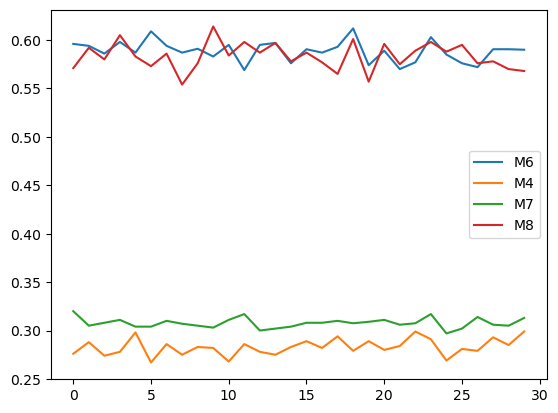

In [100]:
plt.plot(df_mongo_s['M6'], label = 'M6')
plt.plot(df_mongo_s['M4'], label = 'M4')
plt.plot(df_mongo_s['M7'], label = 'M7')
plt.plot(df_mongo_s['M8'], label = 'M8')
plt.legend()
plt.show()

In [101]:
t_test(df_mongo_s['M6'],df_mongo_s['M8'])

0.5885499999999999 0.5832666666666667
t-statistic: 1.6482925802941482
p-value: 0.10469982599915562
There's no significant difference between two data set.


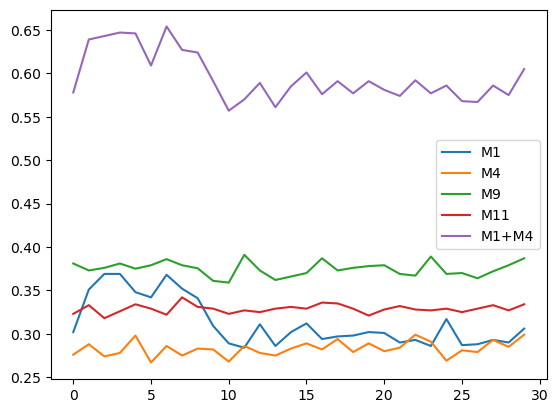

In [102]:
plt.plot(df_mongo_s['M1'], label = 'M1')
plt.plot(df_mongo_s['M4'], label = 'M4')
plt.plot(df_mongo_s['M9'], label = 'M9')
plt.plot(df_mongo_s['M11'], label = 'M11')
plt.plot(df_mongo_s['M1']+df_mongo_s['M4'], label = 'M1+M4')
plt.legend()
plt.show()

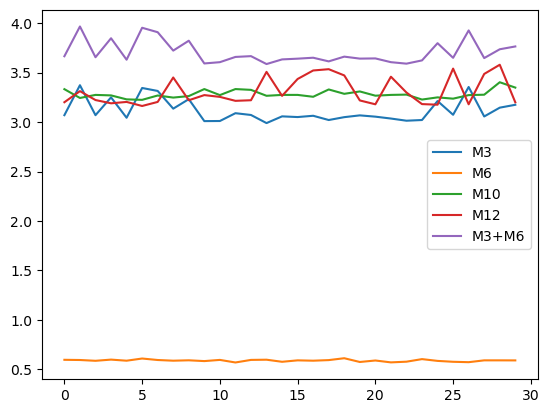

In [103]:
plt.plot(df_mongo_s['M3'], label = 'M3')
plt.plot(df_mongo_s['M6'], label = 'M6')
plt.plot(df_mongo_s['M10'], label = 'M10')
plt.plot(df_mongo_s['M12'], label = 'M12')
plt.plot(df_mongo_s['M3']+df_mongo_s['M6'], label = 'M3+M6')
plt.legend()
plt.show()

##### 5.3 between two database

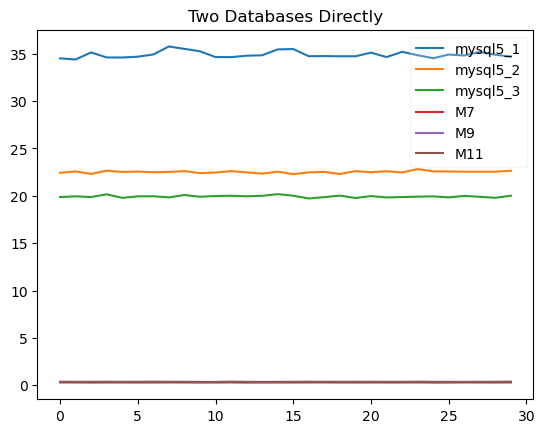

In [104]:
plot_mysql(16,19,'')
Plot_mongo(6,7,'')
Plot_mongo(8,9,'')
Plot_mongo(10,11,'')
plt.title('Two Databases Directly')
plt.show()

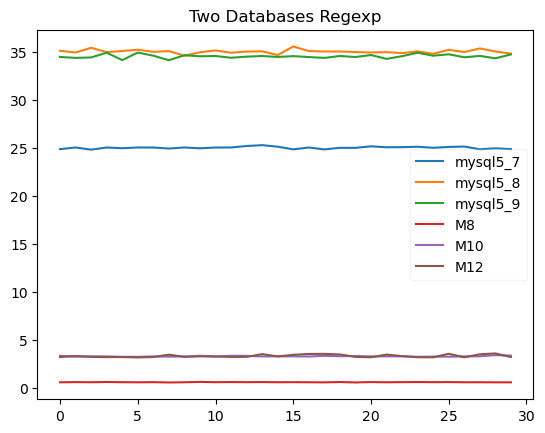

In [105]:
plot_mysql(22,25,'')
Plot_mongo(7,8,'')
Plot_mongo(9,10,'')
Plot_mongo(11,12,'')
plt.title('Two Databases Regexp')
plt.show()

### Part 6

##### 6.1 mysql Part

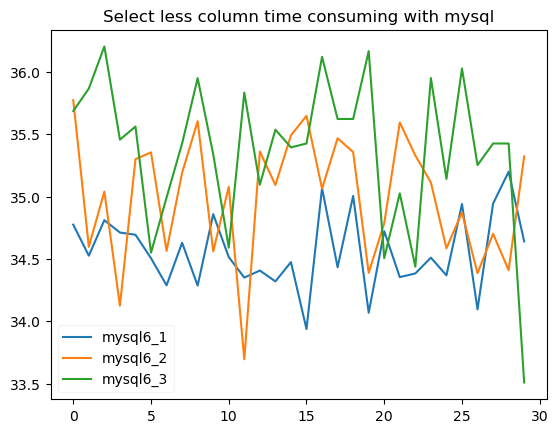

In [106]:
plot_mysql(29,32,'Select less column')
plt.show()

In [109]:
t_test(df_mysql['6_1'],df_mysql['6_2'])
one_t_test(df_mysql['6_2'],df_mysql['6_1'])
t_test(df_mysql['6_2'],df_mysql['6_3'])
one_t_test(df_mysql['6_3'],df_mysql['6_2'])

34.560249853333325 34.994813801666666
t-statistic: -4.0358058976238445
p-value: 0.00016138470189154365
6_2 is significantly greater than 6_1
34.994813801666666 35.37123133
t-statistic: -2.621709172173519
p-value: 0.011155208684150361
6_3 is significantly greater than 6_2


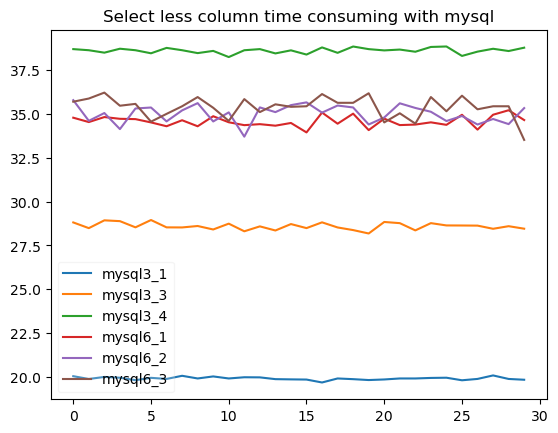

In [110]:
plot_mysql(8,9,'')
plot_mysql(10,12,'')
plot_mysql(29,32,'Select less column')
plt.show()

##### 6.2 Mongo Part

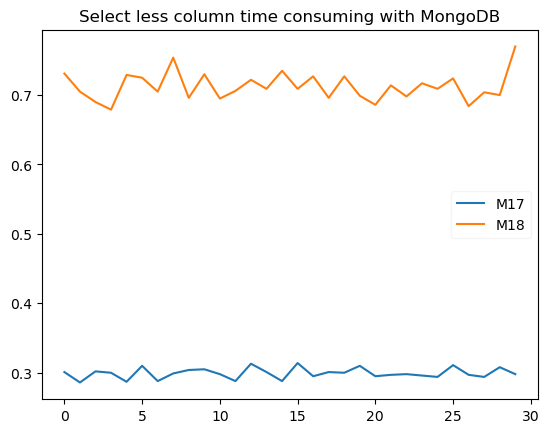

In [111]:
Plot_mongo(16,18,'Select less column')
plt.show()

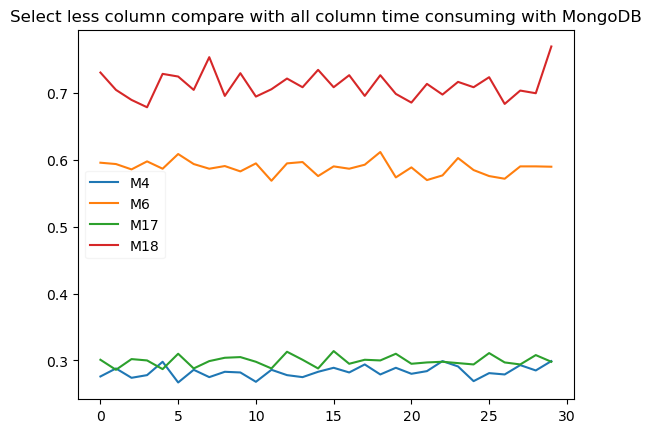

In [112]:
Plot_mongo(3,4,'')
Plot_mongo(5,6,'')
Plot_mongo(16,18,'Select less column compare with all column')
plt.show()

# The outcome is a bit confuse, try another data set.

##### 6.3 Comparation of two database

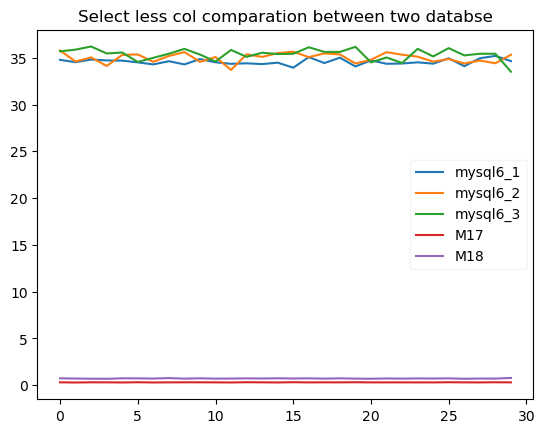

In [113]:
plot_mysql(29,32,'Select less column')
Plot_mongo(16,18,'Select less column compare with all column')
plt.title('Select less col comparation between two databse')
plt.show()

### Part 7

##### 7.1 mysql part

The times of the two col is about 7.178215126010004


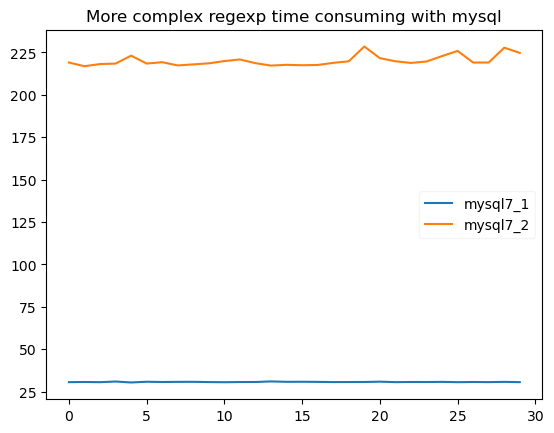

In [114]:
print('The times of the two col is about {}'.format(df_mysql['7_2'].mean()/df_mysql['7_1'].mean()))

plot_mysql(32,34,'More complex regexp')
plt.show()

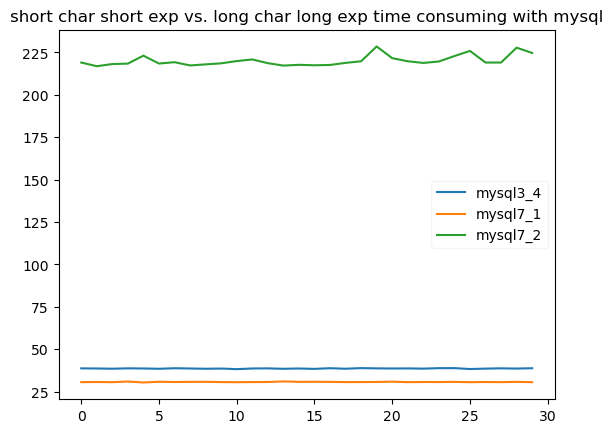

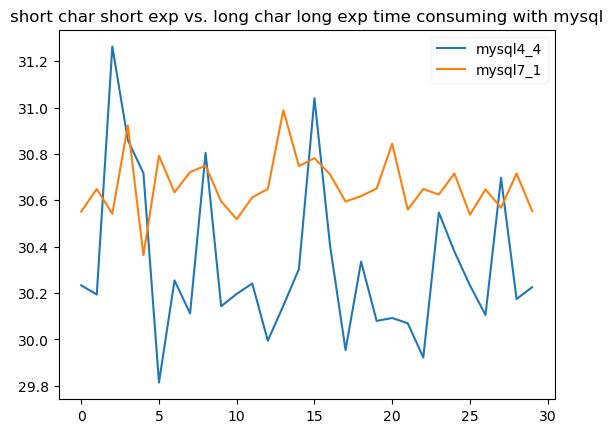

In [115]:
plot_mysql(11,12,'')
plot_mysql(32,34,'short char short exp vs. long char long exp')  
plt.show()
plot_mysql(15,16,'')
plot_mysql(32,33,'short char short exp vs. long char long exp')  
plt.show()

In [117]:
t_test(df_mysql['4_4'],df_mysql['7_1'])
one_t_test(df_mysql['7_1'],df_mysql['4_4'])

30.31781218 30.660288218333324
t-statistic: -5.163071138981563
p-value: 3.103548651606925e-06
7_1 is significantly greater than 4_4


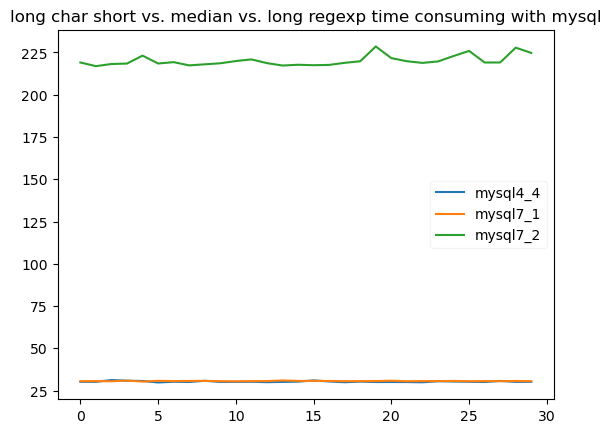

In [118]:
plot_mysql(15,16,'')
plot_mysql(32,34,'long char short vs. median vs. long regexp') 
plt.show()

In [121]:
t_test(df_mysql['4_4'],df_mysql['7_1'])
one_t_test(df_mysql['7_1'],df_mysql['4_4'])

30.31781218 30.660288218333324
t-statistic: -5.163071138981563
p-value: 3.103548651606925e-06
7_1 is significantly greater than 4_4


##### 7.2 Mongo Part

In [122]:
print(df_mongo_s.columns)

Index(['M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'M10', 'M11',
       'M12', 'M13', 'M14', 'M15', 'M16', 'M17', 'M18', 'M19', 'M20'],
      dtype='object')


The times of the two col is about 4.417281249999998


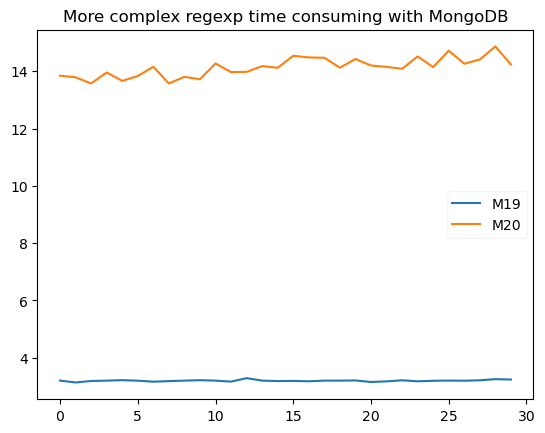

In [123]:
print('The times of the two col is about {}'.format(1/(df_mongo_s['M19'].mean()/df_mongo_s['M20'].mean())))
Plot_mongo(18,20,'More complex regexp')
plt.show()

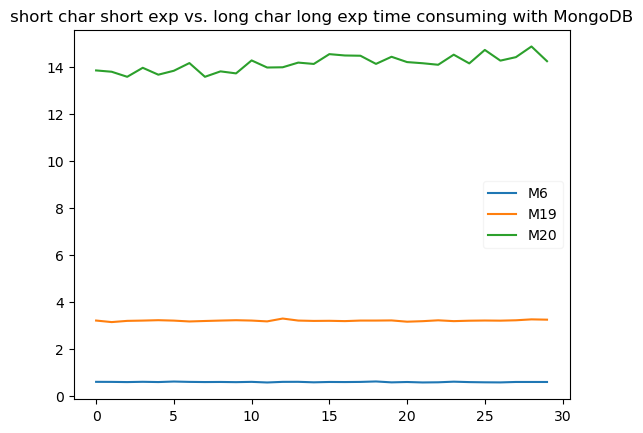

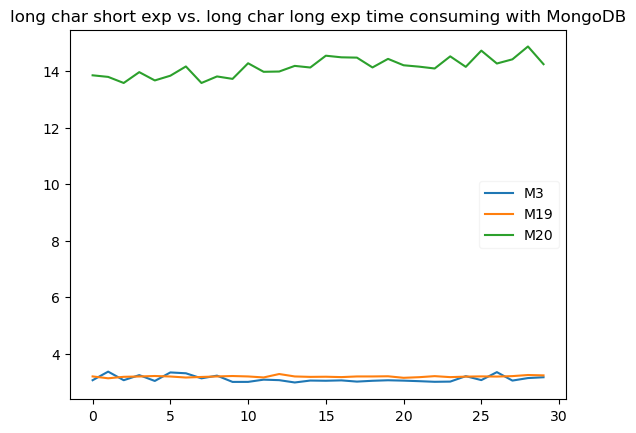

In [124]:
Plot_mongo(5,6,'')
Plot_mongo(18,20,'short char short exp vs. long char long exp')  
plt.show()
Plot_mongo(2,3,'')
Plot_mongo(18,20,'long char short exp vs. long char long exp')  
plt.show()

In [127]:
t_test(df_mongo_s['M3'],df_mongo_s['M19'])
one_t_test(df_mongo_s['M19'], df_mongo_s['M3'])

3.115533333333333 3.200000000000001
t-statistic: -3.9613223907216777
p-value: 0.000206454076377428
M19 is significantly greater than M3


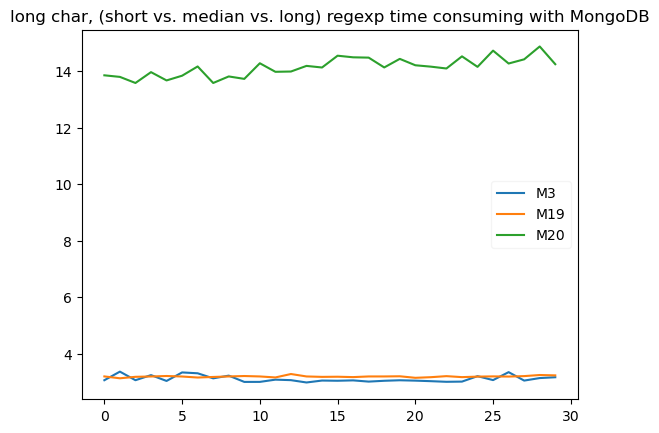

In [128]:
Plot_mongo(2,3,'')
Plot_mongo(18,20,'long char, (short vs. median vs. long) regexp') 
plt.show()

##### 7.3 Comparation between two database

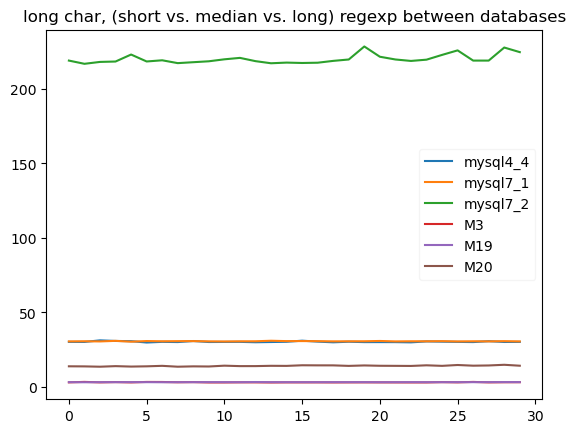

In [129]:
plot_mysql(15,16,'')
plot_mysql(32,34,'long char short vs. median vs. long regexp') 
Plot_mongo(2,3,'')
Plot_mongo(18,20,'long char, (short vs. median vs. long) regexp') 
plt.title('long char, (short vs. median vs. long) regexp between databases')
plt.show()

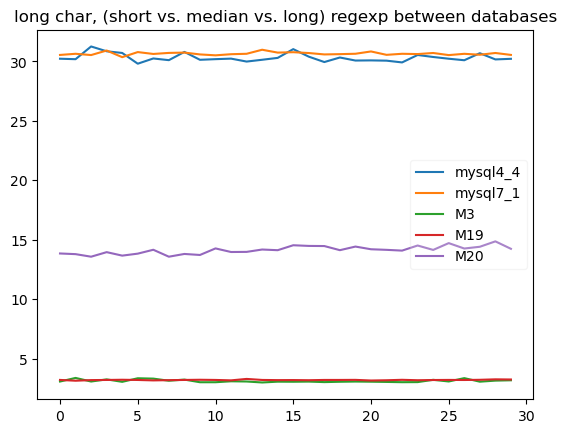

In [130]:
plot_mysql(15,16,'')
plot_mysql(32,33,'long char short vs. median vs. long regexp') 
Plot_mongo(2,3,'')
Plot_mongo(18,20,'long char, (short vs. median vs. long) regexp') 
plt.title('long char, (short vs. median vs. long) regexp between databases')
plt.show()